# Using demandlib

Based on: https://github.com/oemof/demandlib/blob/dev/examples/electricity_demand_example.py

In [1]:
import datetime
from datetime import time as settime

import numpy as np
from matplotlib import pyplot as plt

import demandlib.bdew as bdew
import demandlib.particular_profiles as profiles

Define holidays, as these days show different load profiles

In [2]:
holidays = {
    datetime.date(2010, 5, 24): "Whit Monday",
    datetime.date(2010, 4, 5): "Easter Monday",
    datetime.date(2010, 5, 13): "Ascension Thursday",
    datetime.date(2010, 1, 1): "New year",
    datetime.date(2010, 10, 3): "Day of German Unity",
    datetime.date(2010, 12, 25): "Christmas Day",
    datetime.date(2010, 5, 1): "Labour Day",
    datetime.date(2010, 4, 2): "Good Friday",
    datetime.date(2010, 12, 26): "Second Christmas Day",
}

Add annual demands per sector, with 
- "g0": Services in general
- "h0": Households
- "g6": Services with main operation on weekend 
(see https://demandlib.readthedocs.io/en/latest/bdew.html#electrical-profiles

In [3]:
ann_el_demand_per_sector = {
    "g0": 3000,
    "g6": 3000,
     "h0": 5000,

}

year = 2010

# read standard load profiles
e_slp = bdew.ElecSlp(year, holidays=holidays)

# multiply given annual demand with timeseries
elec_demand = e_slp.get_profile(ann_el_demand_per_sector)

Be aware that the values in the DataFrame are 15 minute values with a power unit. If you sum up a table with 15min values the result will be of the unit 'kW15minutes'!

In [4]:
print(elec_demand.sum())

g0    12000.0
g6    12000.0
h0    20000.0
dtype: float64


You will have to divide the result by 4 to get kWh

In [5]:
print(elec_demand.sum() / 4)

g0    3000.0
g6    3000.0
h0    5000.0
dtype: float64


Or resample the DataFrame to hourly values using the mean() method

g0    3000.0
g6    3000.0
h0    5000.0
dtype: float64


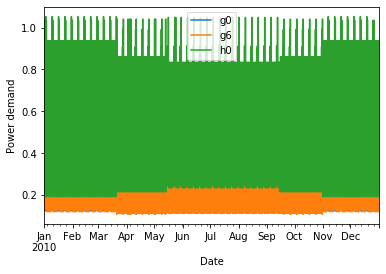

                           g0        g6        h0
2010-01-01 00:00:00  0.187744  0.302024  0.437989
2010-01-01 00:15:00  0.181328  0.274841  0.406332
2010-01-01 00:30:00  0.175030  0.250680  0.375676
2010-01-01 00:45:00  0.169326  0.232558  0.346023
2010-01-01 01:00:00  0.164217  0.220477  0.317772


In [6]:
# Resample 15-minute values to hourly values.
elec_demand_resampled = elec_demand.resample("h").mean()
print(elec_demand_resampled.sum())

# Plot demand
ax = elec_demand_resampled.plot()
ax.set_xlabel("Date")
ax.set_ylabel("Power demand")
plt.show()

print(elec_demand.head())

for key in ann_el_demand_per_sector:
    assert np.isclose(
        elec_demand[key].sum() / 4, ann_el_demand_per_sector[key]
    )

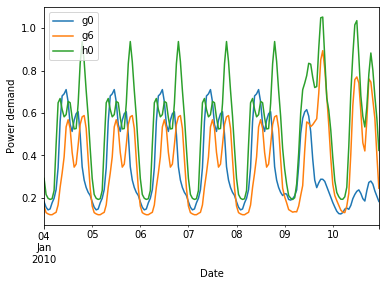

In [7]:
# Plot demand
ax = elec_demand_resampled[24*3:24*3+24*7].plot()
ax.set_xlabel("Date")
ax.set_ylabel("Power demand")
plt.show()
